SuperMarket Sales Data Analysis

In [1]:
#Import the libraries 

#Save our Project
import jovian
#Manipulate file
import os

# Numerical/Dataframe libraries
import pandas as pd 
import numpy as np

# Vizualizing NaN values
import missingno as msno

#Geolocalisation
import folium

#Vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Reading The DATASET

In [2]:

supermarket_df= pd.read_csv('E:/AMotefaker/ABC/Data Analyst/Sales Data Analysis/SuperMarket Sales Data Analysis/supermarket_sales.csv')

In [3]:
supermarket_df.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


Data Preprocessing

In [4]:
shape=supermarket_df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 1000 rows and 17 columns


In [5]:
# Display the number of parameters
supermarket_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
#Chech the Nan values
supermarket_df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

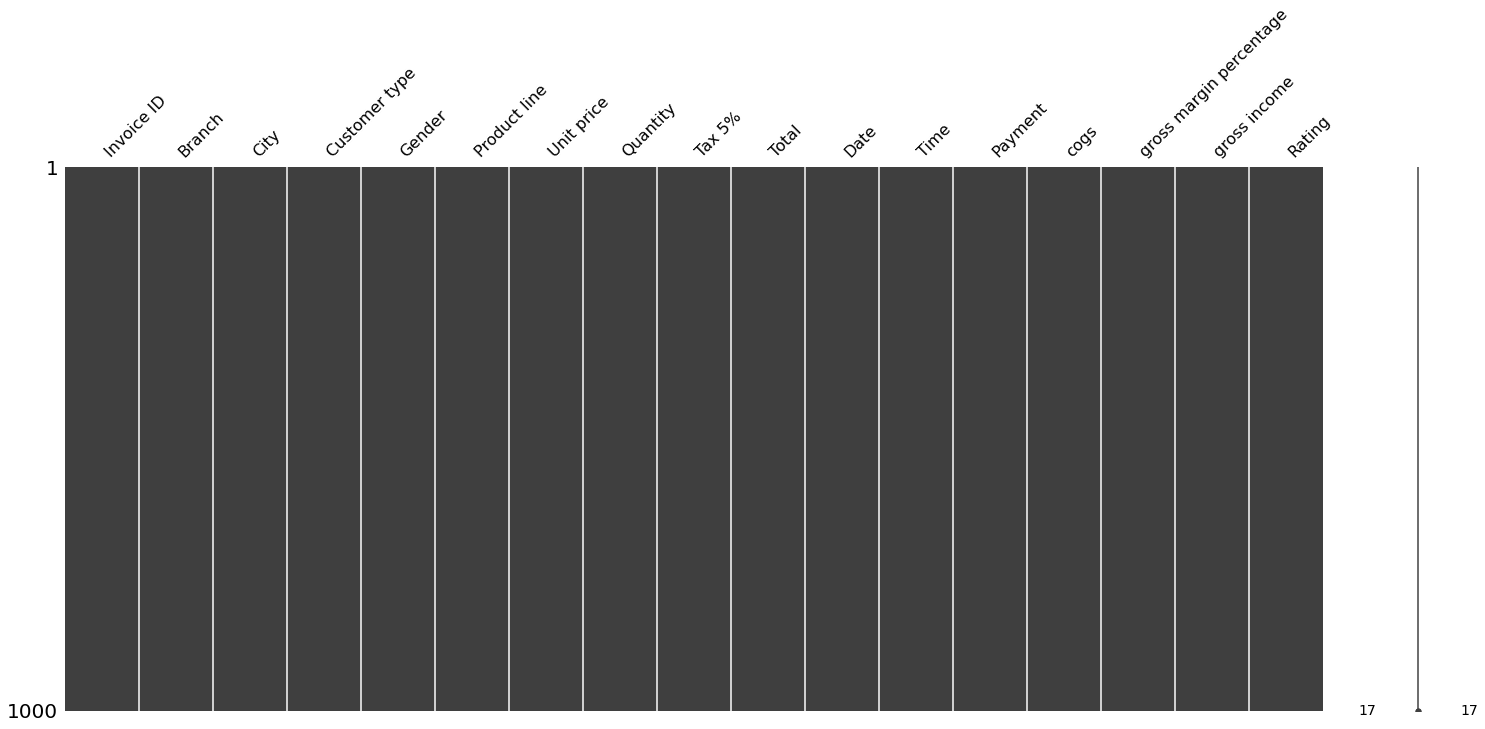

In [7]:
#Visualize the nan values in each columns
msno.matrix(supermarket_df);

In [8]:
#Check the dype of each columns
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Convert the date and time columns into date/time dtypes

In [9]:
# modified_df=supermarket_df.copy()

# Convert date columns into date time 
supermarket_df.Date = pd.to_datetime(supermarket_df.Date)
#Add a month,day and weekday columns
supermarket_df['month']=supermarket_df.Date.dt.month
supermarket_df['day']=supermarket_df.Date.dt.day
supermarket_df['weekday']=supermarket_df.Date.dt.day_name()
#Add a hour and minute columns 
supermarket_df['hour']=supermarket_df.Time.str[0:2]
supermarket_df['minute']=supermarket_df.Time.str[3:5]
#Make it int values
supermarket_df['hour']=pd.to_numeric(supermarket_df['hour'])
supermarket_df['minute']=pd.to_numeric(supermarket_df['minute'])

In [10]:
supermarket_df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                               int64
day                                 int64
weekday                            object
hour                                int64
minute                              int64
dtype: object

In [11]:
supermarket_df.describe().style.background_gradient(cmap='BuPu')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month,day,hour,minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700,1.993000,15.256000,14.910000,30.098000
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580,0.835254,8.693563,3.186857,16.880680
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,1.000000,1.000000,10.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000,1.000000,8.000000,12.000000,16.000000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000,2.000000,15.000000,15.000000,30.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000,3.000000,23.000000,18.000000,44.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000,3.000000,31.000000,20.000000,59.000000


#### Exploratory Data Analysis

In [12]:
#Matplotlib config
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12,9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### City

In [13]:
supermarket_df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [14]:
cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.8409,19.7633,21.9588],
                       'Longitude' : [96.1735, 96.0785, 96.0891]})

market_map = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)

#market_map - Delete # to see the map

<Figure size 57600x43200 with 0 Axes>

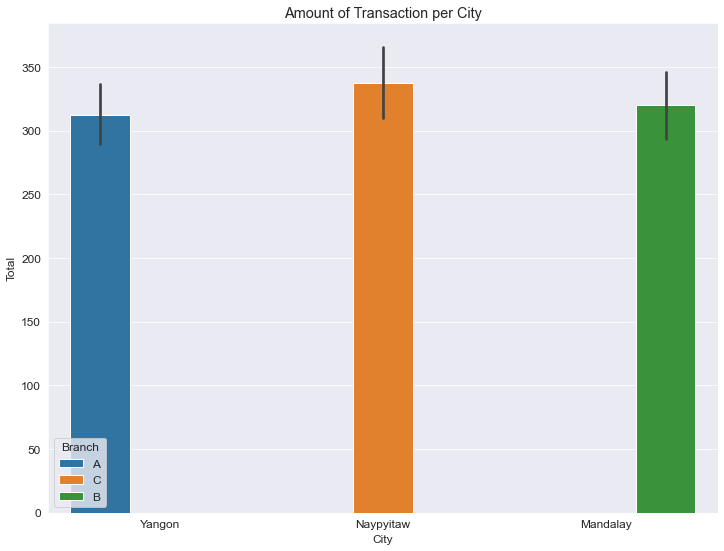

In [15]:
# supermarket_df.groupby('City').count()
plt.title('Amount of Transaction per City')
sns.barplot(x='City',y='Total',data=supermarket_df,hue='Branch');

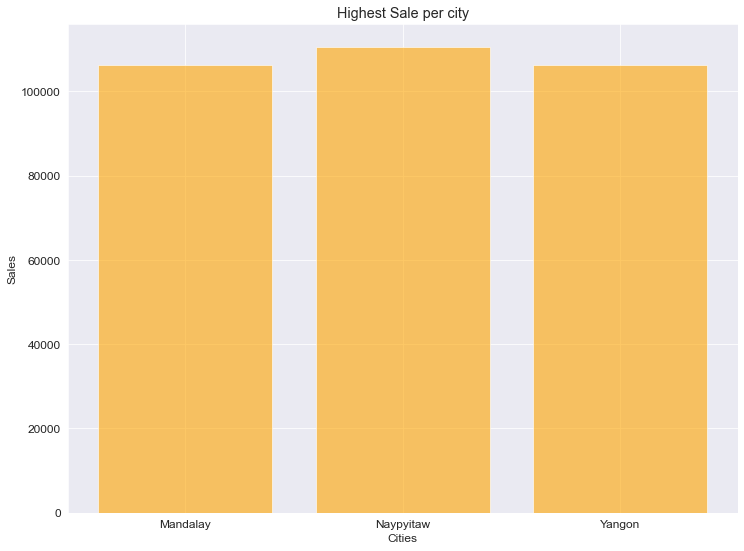

In [16]:
#Parameter for plotting 
sale=supermarket_df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, supermarket_df in supermarket_df.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='orange',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

##### Month

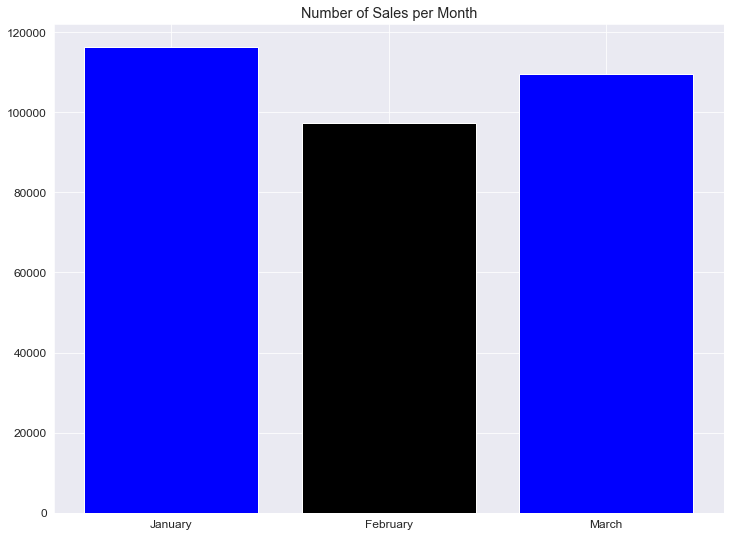

In [17]:
#Parameters for plotting 
sale=supermarket_df.groupby('month').sum()['Total']
month=['January','February','March']
c=['b','k','b']
#Plot
plt.figure(figsize=(12,9))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()
# print(sale)

##### Quantity

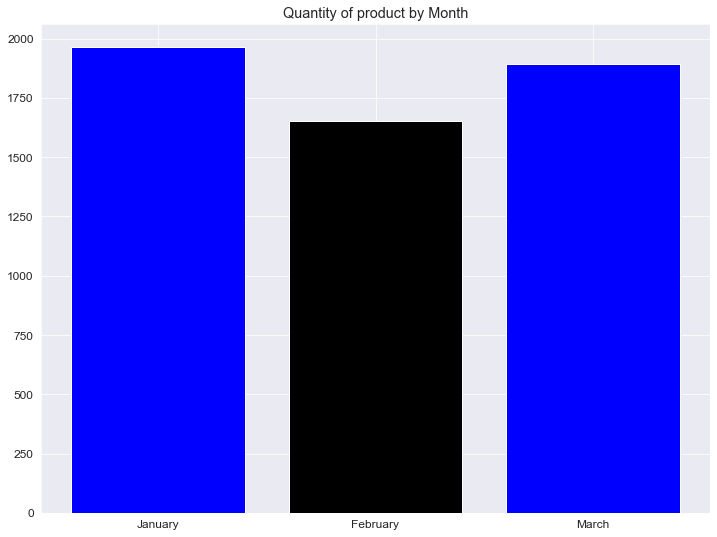

In [18]:
#Y-axis
quantity=supermarket_df.groupby('month').sum()['Quantity']

#Plot
plt.title('Quantity of product by Month')
plt.bar(month,quantity,color=c)
plt.show()

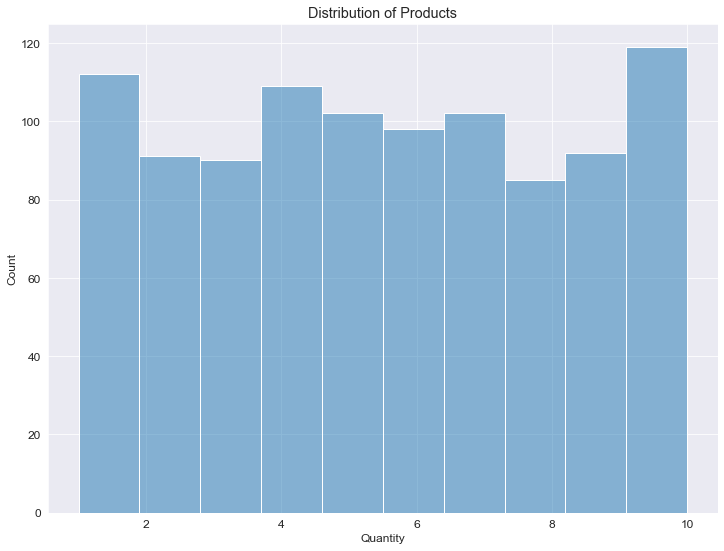

In [19]:
#Plot an histogram
plt.title('Distribution of Products')
sns.histplot(supermarket_df.Quantity,alpha=0.5, bins=10);

#####  Payment

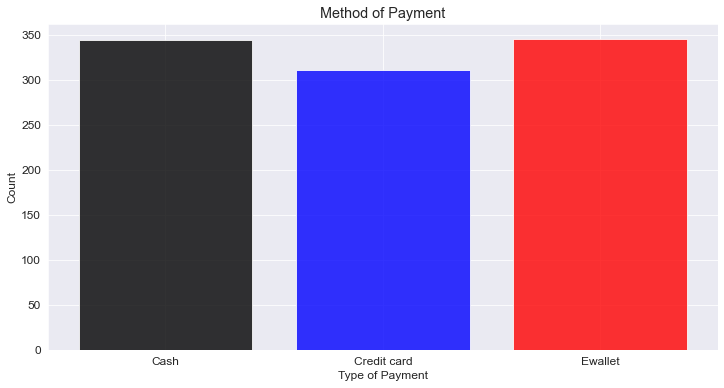

In [20]:
# Parameters for plotting
method=supermarket_df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment,method,color=c,alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

C:\Users\Yepco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


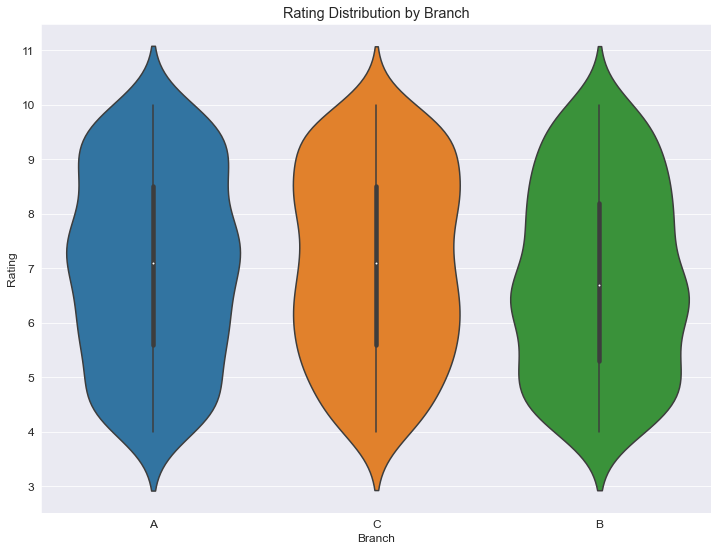

In [21]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=supermarket_df);

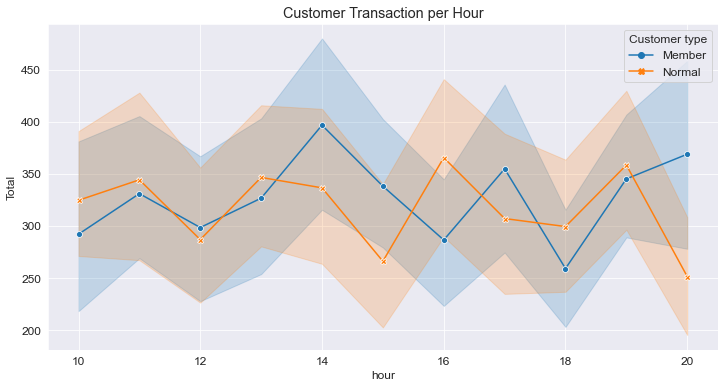

In [22]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=supermarket_df,x='hour',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False);

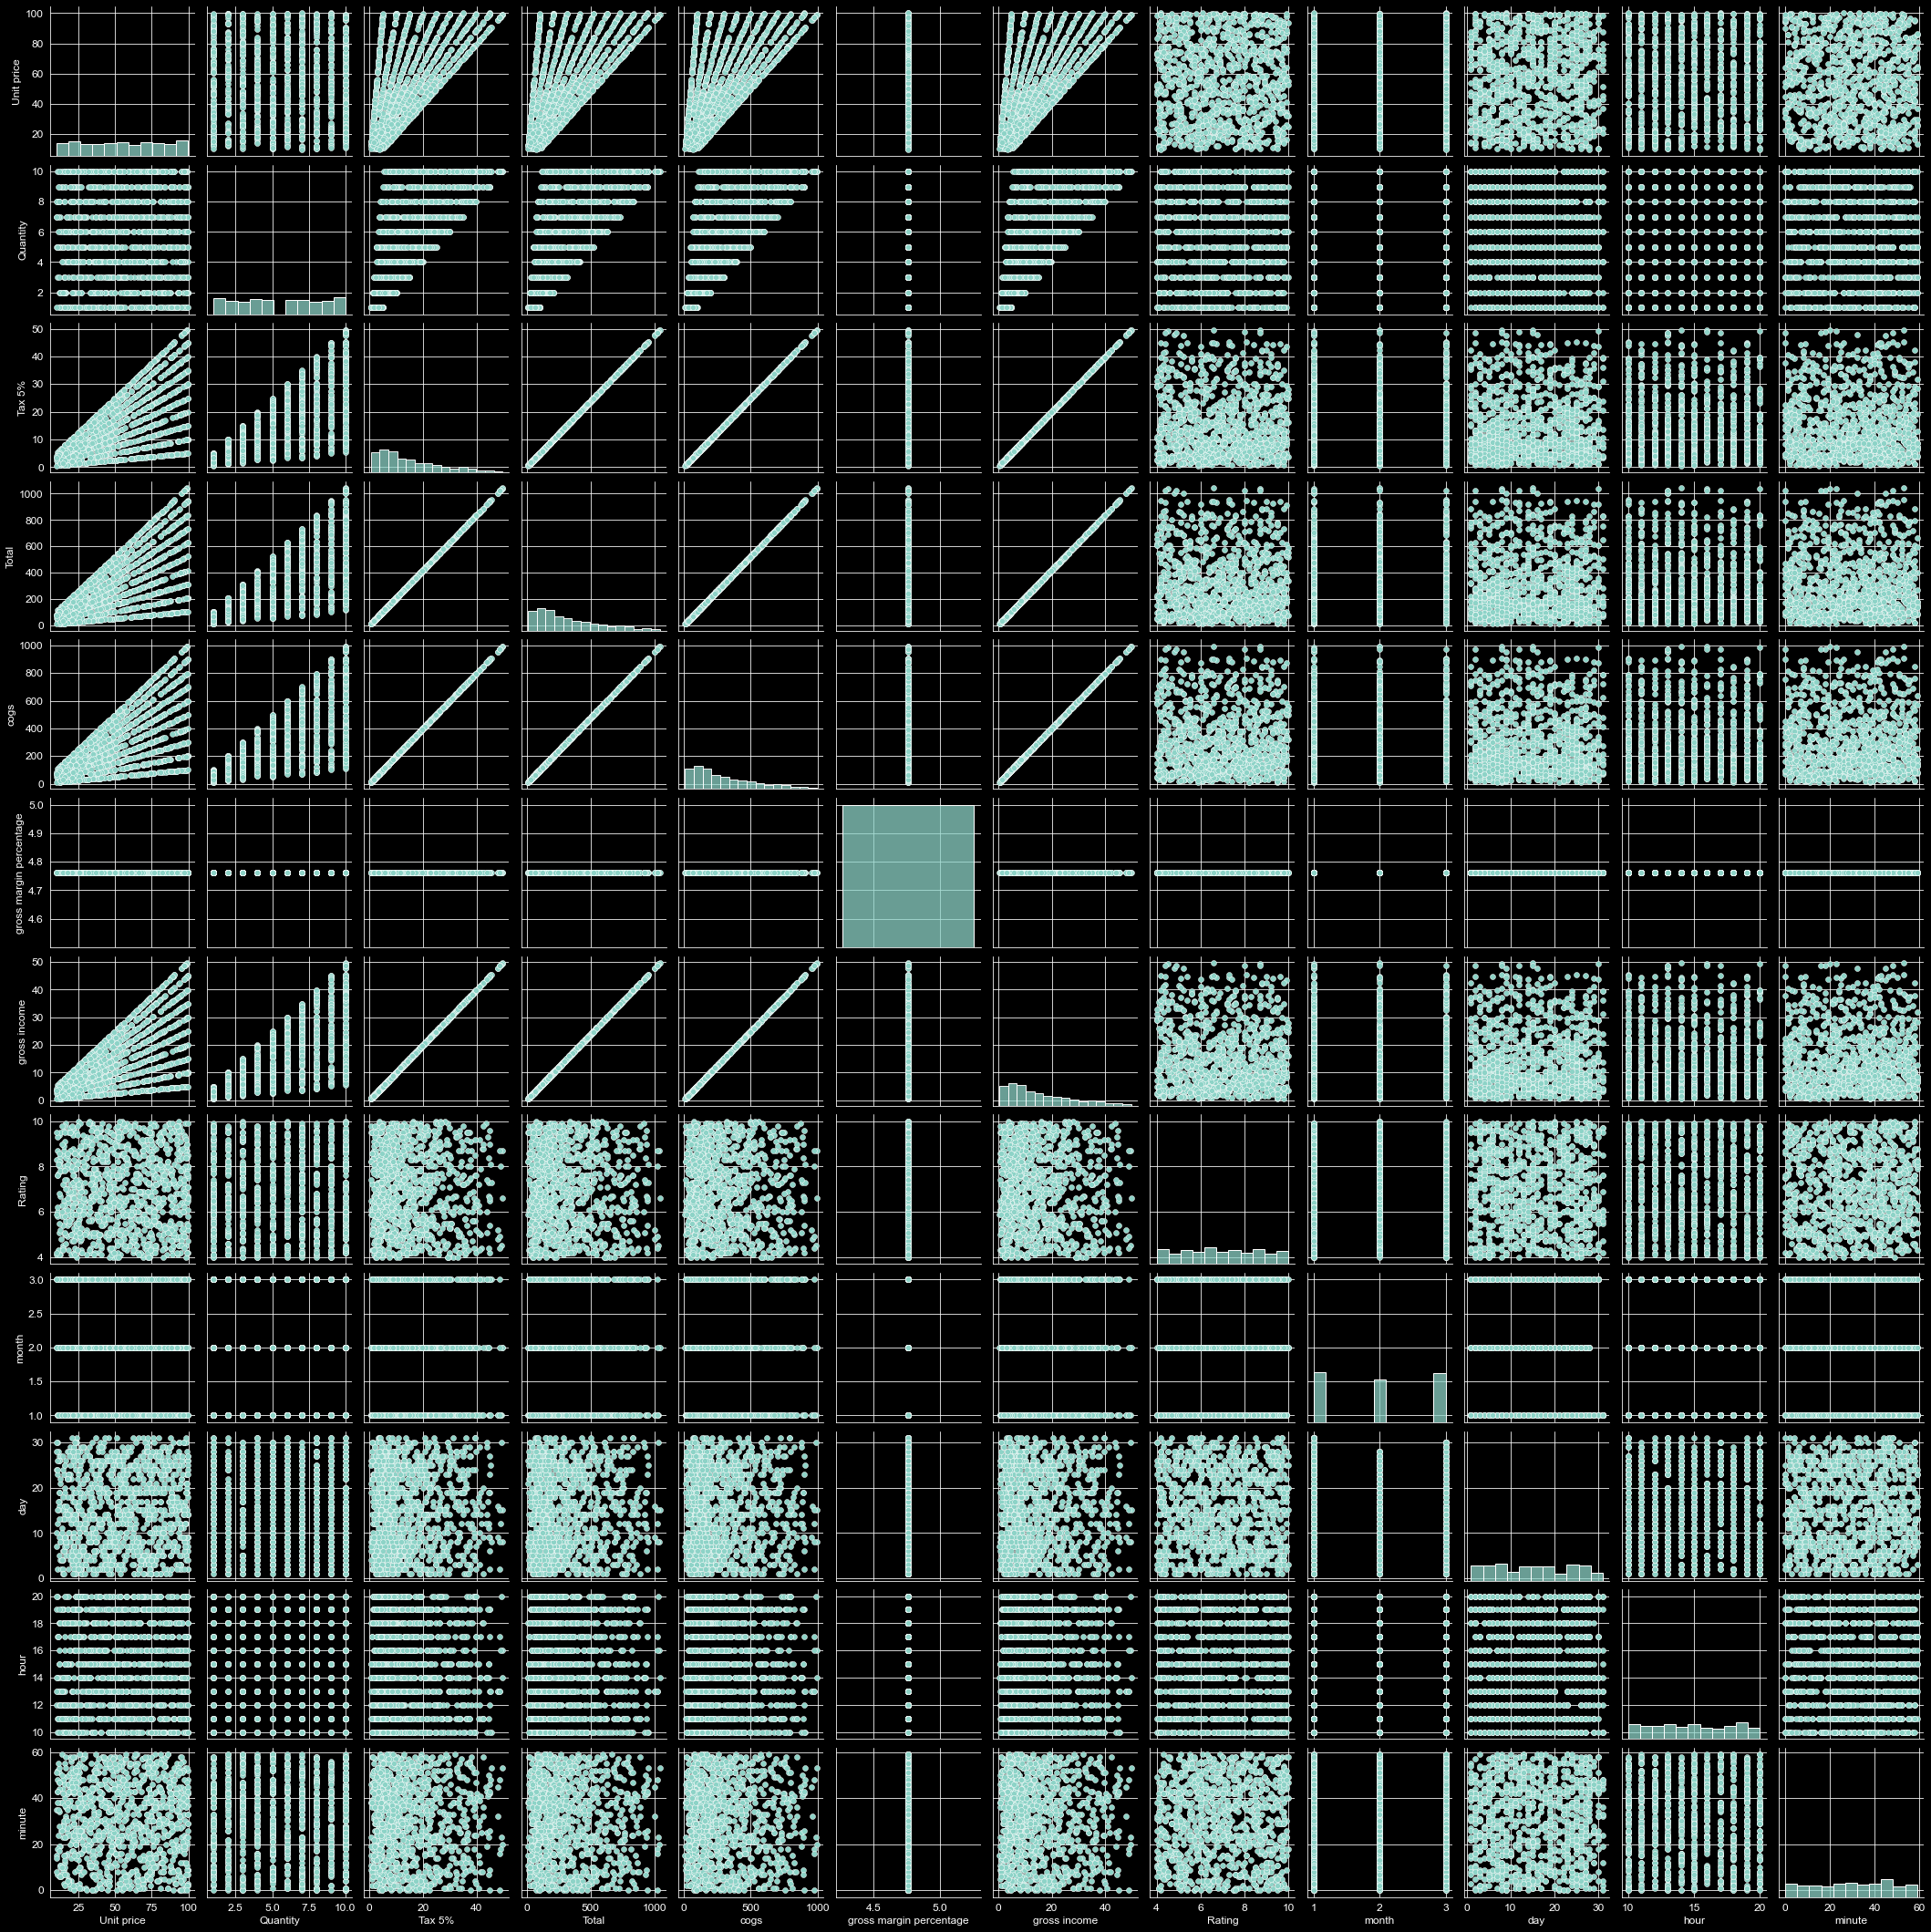

In [23]:
plt.style.use(['dark_background'])
sns.pairplot(supermarket_df);

In [24]:
#Create a correlation matrix
corr_df=supermarket_df.corr()

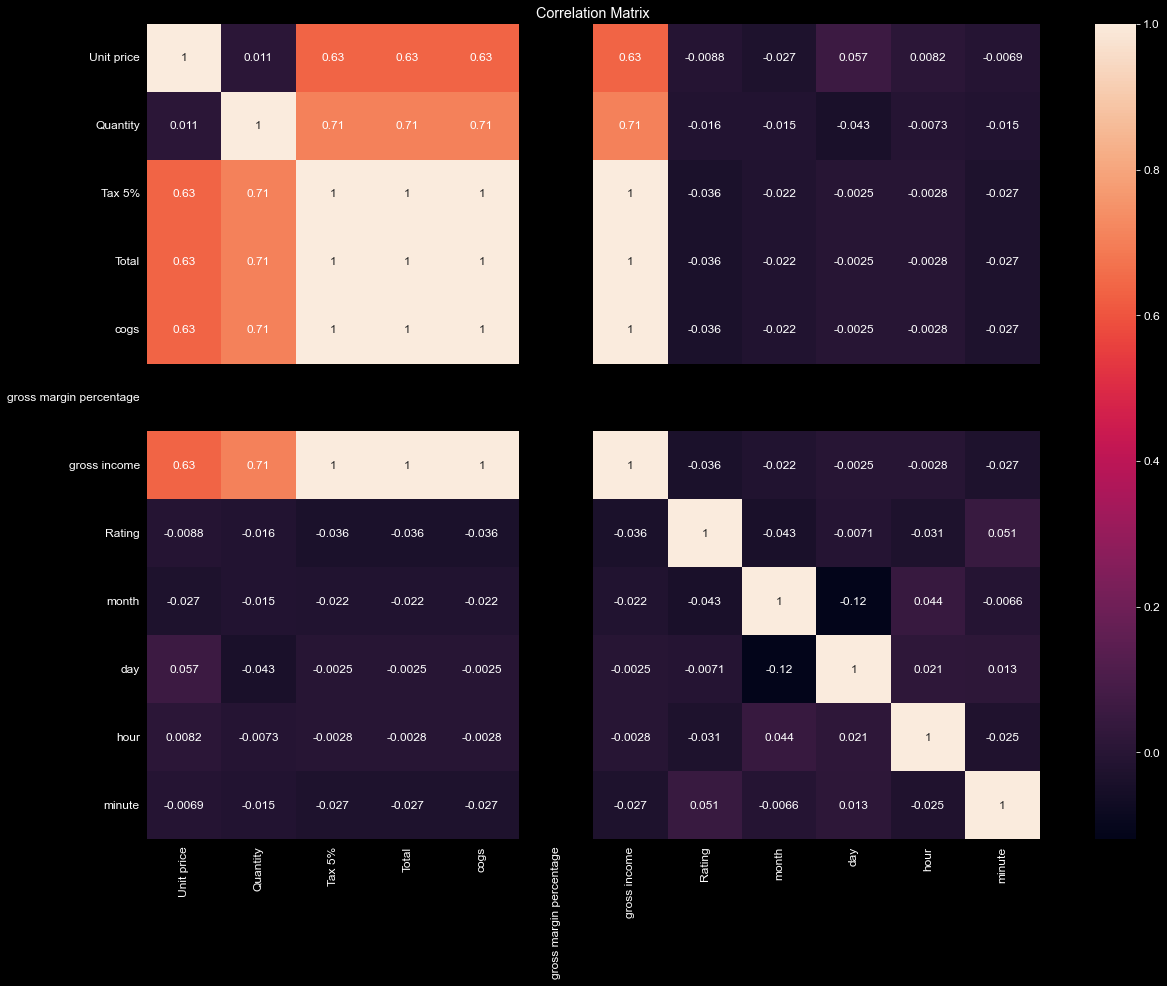

In [25]:
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

What was the total number of sales?

In [26]:
total_sale=supermarket_df['Total'].sum()
print('The total number of sales of the supermarket is {:.2f}$'.format(total_sale))

The total number of sales of the supermarket is 322966.75$


What branch has the highest number of sales?

In [27]:
sale_branch=supermarket_df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.7065$


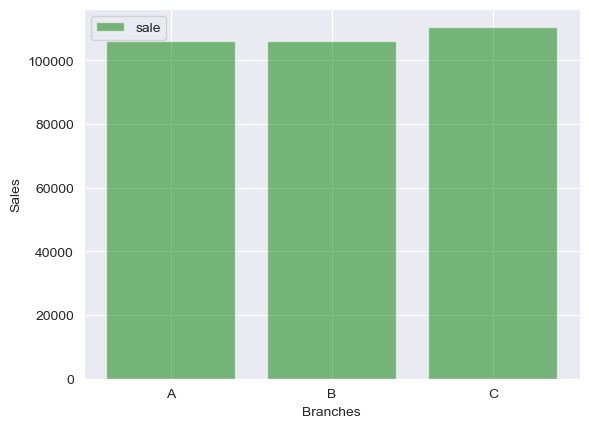

In [28]:
plt.style.use('default')
sns.set_style('darkgrid')
#Paramter for the x-axis
branches = [branch for branch, supermarket_df in supermarket_df.groupby('Branch')]
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'])
plt.show()

What type of product is sold the most?

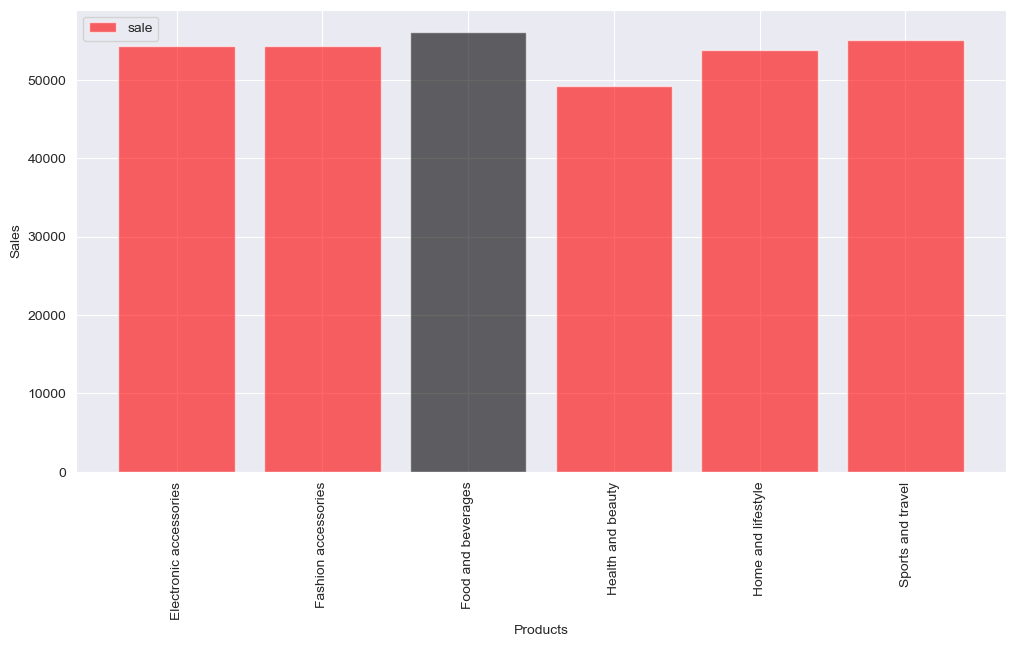

In [29]:
#Parameters
sale_product=supermarket_df.groupby('Product line').sum()['Total']
products =[product for product, supermarket_df in supermarket_df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph
plt.figure(figsize=(12,6))
plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

What gender buy the most product? What gender buy more items in each category? what is the category?

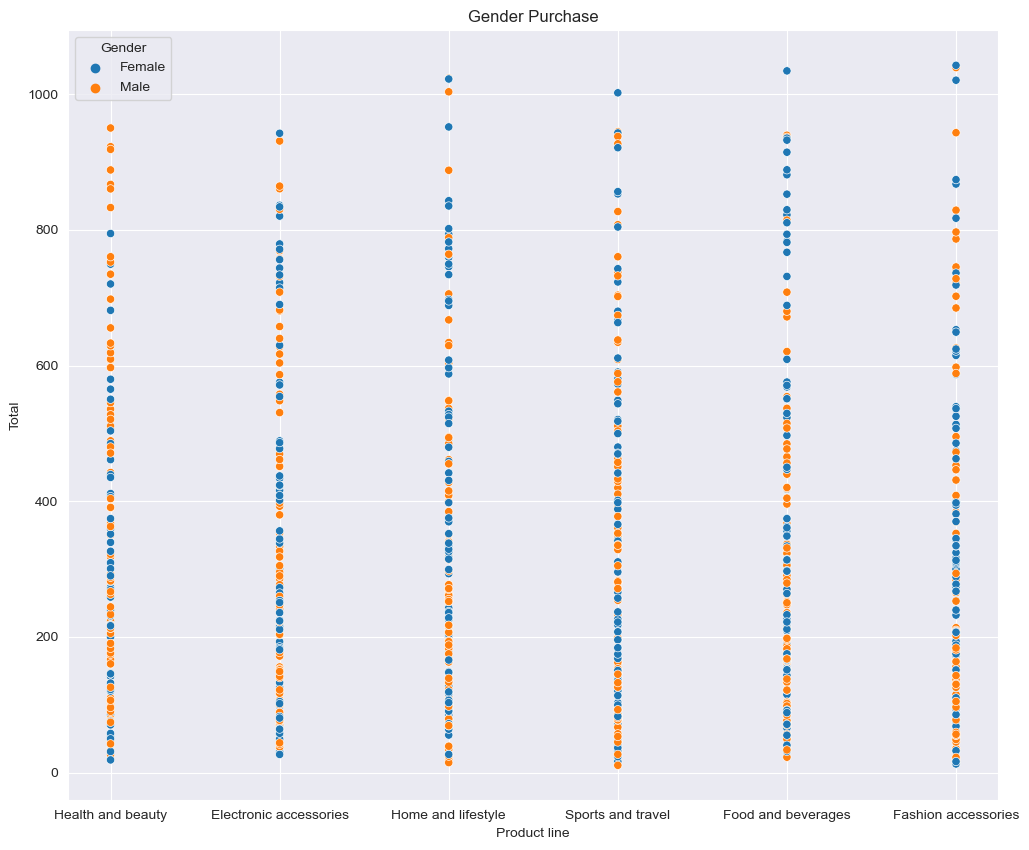

In [30]:
#Plot Gender purchase by product line
plt.figure(figsize=(12,10))
plt.title('Gender Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Gender',data=supermarket_df);

In [31]:
gender_market=supermarket_df[['Gender','Total','Product line','Customer type']].sort_values('Total',ascending=False)

In [32]:
gender_market['male']=gender_market['Gender'][gender_market['Gender'] == 'Male']
gender_market['female']=gender_market['Gender'][gender_market.Gender.str.contains('Female')]
product_gender=gender_market.groupby('Product line').count()
product_gender
# male=product_gender['male']/product_gender['Total'].tolist()
gender_market.drop(columns=['male','female'],inplace=True)

In [33]:
print('Men buy more product in 3 categories: \nElectronic accessories: 86 men\nHealth and beauty: 88 men\nHome and lifestyle: 81 men\n')
print('Women buy more product in 3 categories: \nFashion accessories: 96 women\nFood and beverages: 90 women\nsports and travel: 88 women ')

Men buy more product in 3 categories: 
Electronic accessories: 86 men
Health and beauty: 88 men
Home and lifestyle: 81 men

Women buy more product in 3 categories: 
Fashion accessories: 96 women
Food and beverages: 90 women
sports and travel: 88 women 


How many people buy more than the average price in each category?

In [34]:
mean_sale=gender_market['Total'].mean()
product_line=gender_market['Product line'].unique()
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


Are they a member of the supermarket?

In [35]:
people=[]
for product in product_line:
    p=gender_market[(gender_market['Total']>322.96) & (gender_market['Product line'] == product)].count()['Total']
    people.append(p)
num_people=np.sum(people)

In [36]:
#Result
print('The number of people who buy more average price by product line are:\n')
for pro, p in zip(product_line,people):
    print(f'{pro}: {p} people')
print(f'\nFor a total of {num_people} people')

The number of people who buy more average price by product line are:

Fashion accessories: 69 people
Food and beverages: 67 people
Home and lifestyle: 66 people
Sports and travel: 75 people
Health and beauty: 60 people
Electronic accessories: 67 people

For a total of 404 people


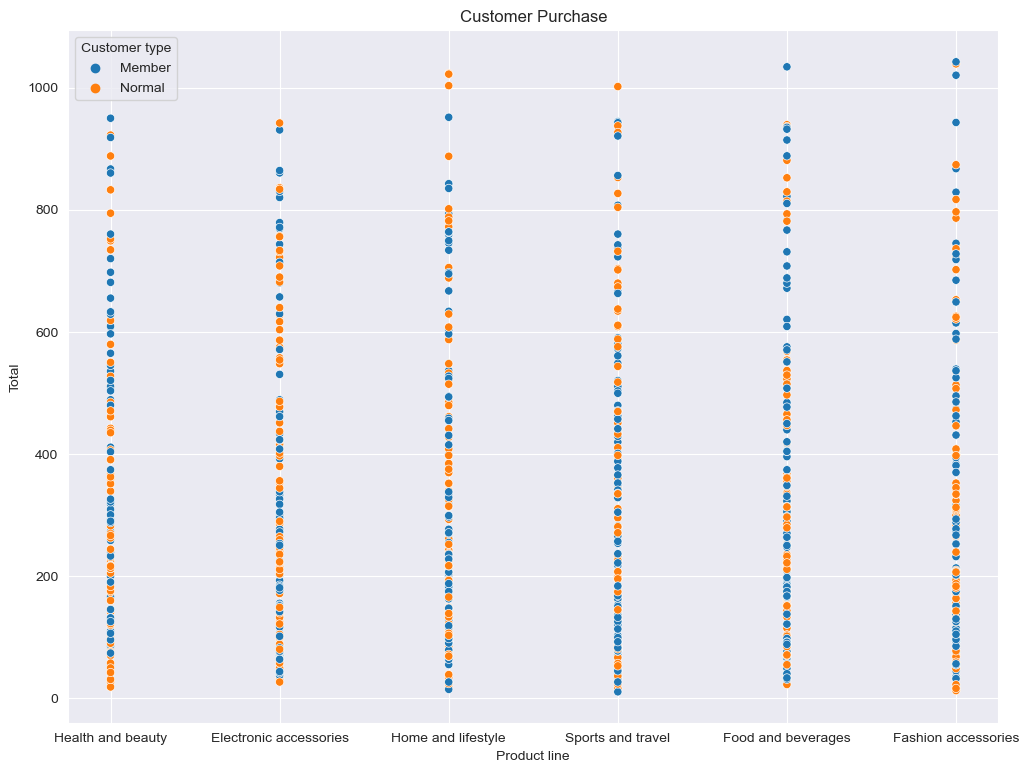

In [37]:
plt.figure(figsize=(12,9))
plt.title('Customer Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Customer type',data=supermarket_df);

In [38]:
member=gender_market[(gender_market['Total']>322.96) & (gender_market['Customer type'] == 'Member')].count()['Total']
member_percentage =(member/num_people)*100
print('{:.2f}% that buy more than the average price are members'.format(member_percentage))

50.50% that buy more than the average price are members


How many female members buy more than the average price in "Food and beverages" category?

In [39]:
gender_market[(gender_market['Total']>322.96) & (gender_market['Gender'] == 'Female') & (gender_market['Product line'] == 'Food and beverages') & (gender_market['Customer type'] == 'Member')].count()['Total']

23

What is the favorite method of payment of the members? of the normal customers?

In [40]:
member_df=supermarket_df[supermarket_df['Customer type']=='Member']
Ncustomer_df=supermarket_df[supermarket_df['Customer type']=='Normal']

In [41]:
print('Cash is used the most as method of payment')

Cash is used the most as method of payment


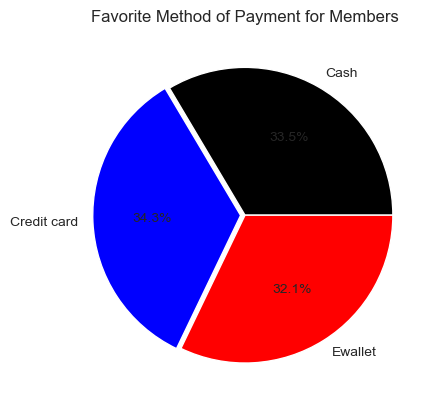

In [42]:
#Parameters for plotting
method=member_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot the bar figure 

plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Members')
plt.show()

In [43]:
print('The favorite method of payment for the member is credit card and cash')

The favorite method of payment for the member is credit card and cash


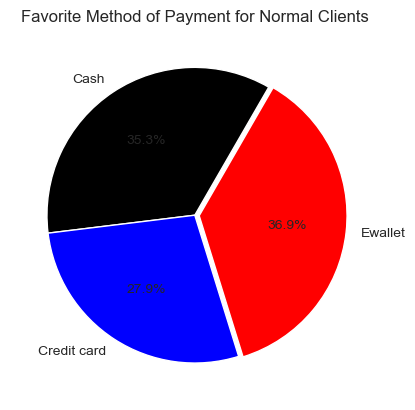

In [44]:
#Parameters for plotting
method=Ncustomer_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot 
plt.pie(method,colors=c,labels=payment,startangle=60,explode=[0,0,0.03],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Normal Clients')
plt.show()

In [45]:
print('The favorite method of payment for the member is Ewallet following by Cash')

The favorite method of payment for the member is Ewallet following by Cash


What time should we display an advertisement to maximize the revenue?

In [46]:
#Parameter for plotting
sale=supermarket_df.groupby('hour').sum()['Total']
hours=[hour for hour, supermarket_df in supermarket_df.groupby('hour')]

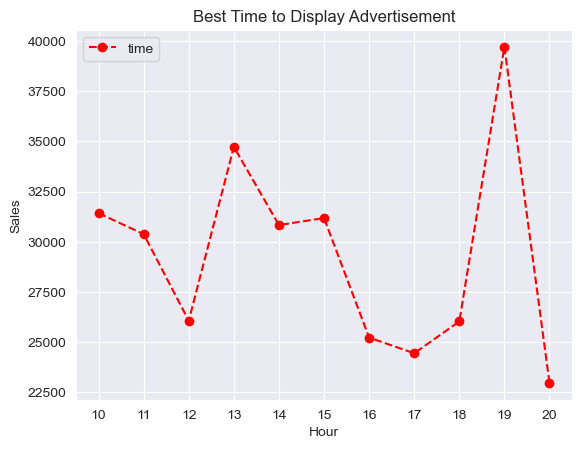

In [47]:
#Plot
plt.plot(hours,sale,'o--r')
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Best Time to Display Advertisement')
plt.legend(['time'])
plt.show()